In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from util.evaluation import SMAPE
%matplotlib inline

traffic=pd.read_csv('../data/cl_traffic.csv')

traffic=traffic.fillna(0)

traffic.head()

sample_index=np.random.choice(traffic.index,1000,replace=False)
sample_series=[]
for u in sample_index:
#     print('Training...|| {:.2f}'.format(u/tot_len*100)+'%',end='\r')
    sample_series.append(traffic.loc[u][:-4].values)

def diff(x,epsilon=1e-3):
    return((x[1:]-x[:-1])/(x[:-1]+epsilon))

combs=np.array([[0,0,0]])
for series in range(len(sample_series)):
    change=diff(sample_series[series][1:-2])
    comb=np.array([change[1:-2],change[2:-1],change[3:]]).T
    combs=np.concatenate((combs,comb),axis=0)

In [8]:
combs[combs>2]=2

range (-1,2) to 1200 bins

(array([ 1535.,    69.,   108.,   207.,   202.,   320.,   505.,   600.,
          436.,   340.,  1085.,   482.,  1039.,   736.,   556.,  2194.,
         1079.,  1116.,  1709.,  1237.,  2434.,  2094.,  2547.,  2407.,
         3022.,  3506.,  3551.,  3918.,  4029.,  3448., 12837.,  3311.,
         3167.,  2722.,  2540.,  2132.,  1627.,  1777.,  1341.,  1725.,
          874.,  1128.,   791.,   748.,  1468.,   434.,   503.,   654.,
          362.,   783.,   270.,   345.,   399.,   390.,   286.,   221.,
          238.,   184.,   139.,  1595.]),
 array([-1.        , -0.96666667, -0.93333333, -0.9       , -0.86666667,
        -0.83333333, -0.8       , -0.76666667, -0.73333333, -0.7       ,
        -0.66666667, -0.63333333, -0.6       , -0.56666667, -0.53333333,
        -0.5       , -0.46666667, -0.43333333, -0.4       , -0.36666667,
        -0.33333333, -0.3       , -0.26666667, -0.23333333, -0.2       ,
        -0.16666667, -0.13333333, -0.1       , -0.06666667, -0.03333333,
         0.     

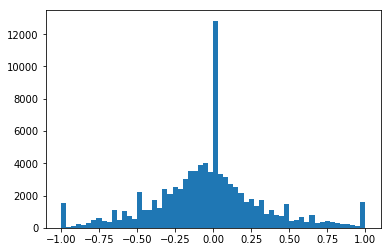

In [36]:
plt.hist(list(combs.T[0,:][:100000]),range=(-1,1),bins=60)

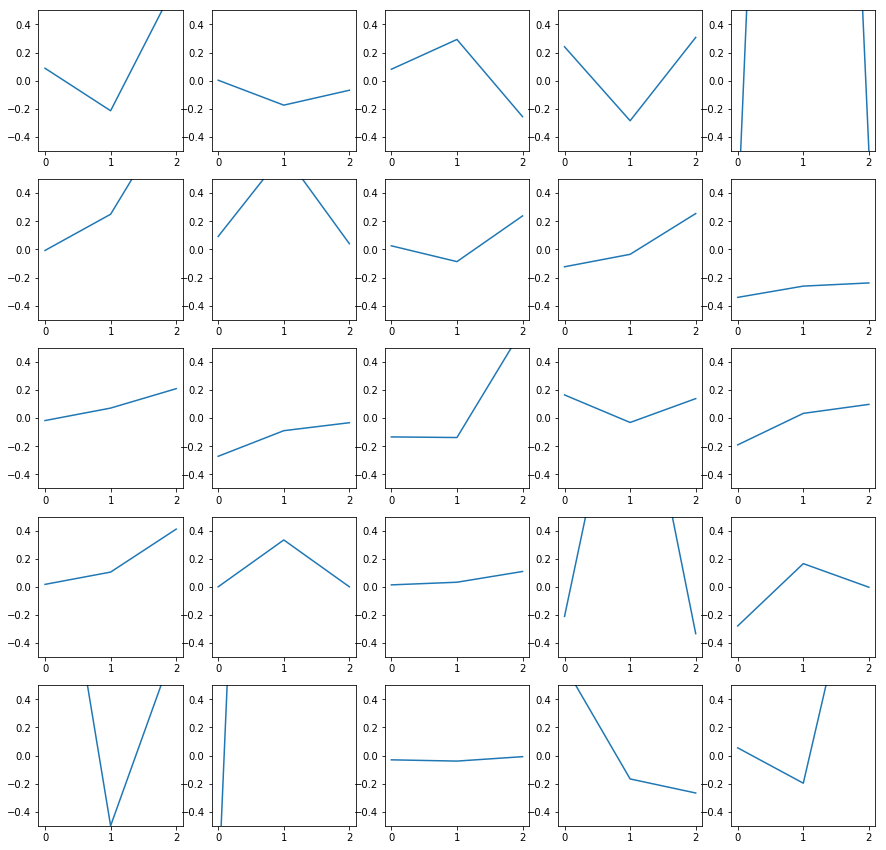

In [67]:
sample=np.random.choice(np.arange(len(combs)),25,replace=False)
n=1
plt.figure(figsize=(15,15))
plt.ylim=(-0.5,0.5)
for s in sample:
    plt.subplot(5,5,n)
    axes = plt.gca()
#     axes.set_xlim([xmin,xmax])
    axes.set_ylim([-0.5,0.5])
    
    plt.plot(combs[s,:])
    n+=1
plt.show()

In [68]:
sample=np.random.choice(np.arange(len(combs)),250,replace=False)

In [69]:
sample_combs=combs[sample,:]

In [70]:
for i in range(len(sample_combs)):
    sample_combs[i,:]

In [61]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(xs=combs[sample,0], ys=combs[sample,1], zs=combs[sample,2])

In [58]:
# combs[sample,0]

In [71]:
import plotly
plotly.tools.set_credentials_file(username='yp653', api_key='R50kMp9GpijMsUK59JDa')

In [73]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

trace1 = go.Scatter3d(
    x=combs[sample,0], y=combs[sample,1], z=combs[sample,2],
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)


data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~yp653/0 or inside your plot.ly account where it is named 'simple-3d-scatter'
